#Task 2: Exploratory Data Analysis


Objective:

Calculate summary statistics (mean, median, mode,
standard deviation).

Visualize data distributions using histograms, boxplots,
and scatter plots.

Find correlations between numerical features.

# Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


##Interpretation:

We import pandas for data handling, numpy for numerical operations, and matplotlib/seaborn for visualization. Setting a clean style ensures our plots look professional.

# Step 2: Load the Dataset




In [2]:

from google.colab import files
uploaded = files.upload()



Saving 4) house Prediction Data Set.csv to 4) house Prediction Data Set.csv


In [17]:
import io
with open('4) house Prediction Data Set.csv', 'r') as f:
    content = f.read()
    lines = content.splitlines()
    df = pd.read_csv(io.StringIO('\n'.join(lines)), sep='\s+', header=None)

df.columns = [f'col{i+1}' for i in range(df.shape[1])]
print("✅ Dataset Loaded Successfully!")
display(df.head())

✅ Dataset Loaded Successfully!


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3515955826.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(io.StringIO('\n'.join(lines)), sep='\s+', header=None)


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


##Interpretation:

We load the stock price dataset into df and display the first 5 rows to understand its structure (columns, sample values).

# Step 3: Basic Info and Shape

In [18]:
df.info()
print(f"\nRows: {df.shape[0]}, Columns: {df.shape[1]}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    506 non-null    float64
 1   col2    506 non-null    float64
 2   col3    506 non-null    float64
 3   col4    506 non-null    int64  
 4   col5    506 non-null    float64
 5   col6    506 non-null    float64
 6   col7    506 non-null    float64
 7   col8    506 non-null    float64
 8   col9    506 non-null    int64  
 9   col10   506 non-null    float64
 10  col11   506 non-null    float64
 11  col12   506 non-null    float64
 12  col13   506 non-null    float64
 13  col14   506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB

Rows: 506, Columns: 14


##Interpretation:

df.info() shows data types and non-null counts (helpful for knowing numeric vs categorical columns).

Shape tells us how large the dataset is.

# Step 4: Summary Statistics

In [11]:
print("\n--- Summary Statistics ---")
display(df.describe())

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

print("\n--- Median Values ---")
print(df[numeric_cols].median())

print("\n--- Mode for Each Column ---")
for col in numeric_cols:
    print(f"{col}: {df[col].mode()[0]}")


--- Summary Statistics ---


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000



--- Median Values ---
col1       0.25651
col2       0.00000
col3       9.69000
col4       0.00000
col5       0.53800
col6       6.20850
col7      77.50000
col8       3.20745
col9       5.00000
col10    330.00000
col11     19.05000
col12    391.44000
col13     11.36000
col14     21.20000
dtype: float64

--- Mode for Each Column ---
col1: 0.01501
col2: 0.0
col3: 18.1
col4: 0
col5: 0.538
col6: 5.713
col7: 100.0
col8: 3.4952
col9: 24
col10: 666.0
col11: 20.2
col12: 396.9
col13: 6.36
col14: 50.0


##Interpretation:

Mean → Average value (gives central tendency).

Median → Middle value (good for skewed data).

Mode → Most frequent value (important for categorical columns).

Standard Deviation → How spread out the data is.

High standard deviation → More variability in stock prices.

# Step 5: Visualize Data Distributions

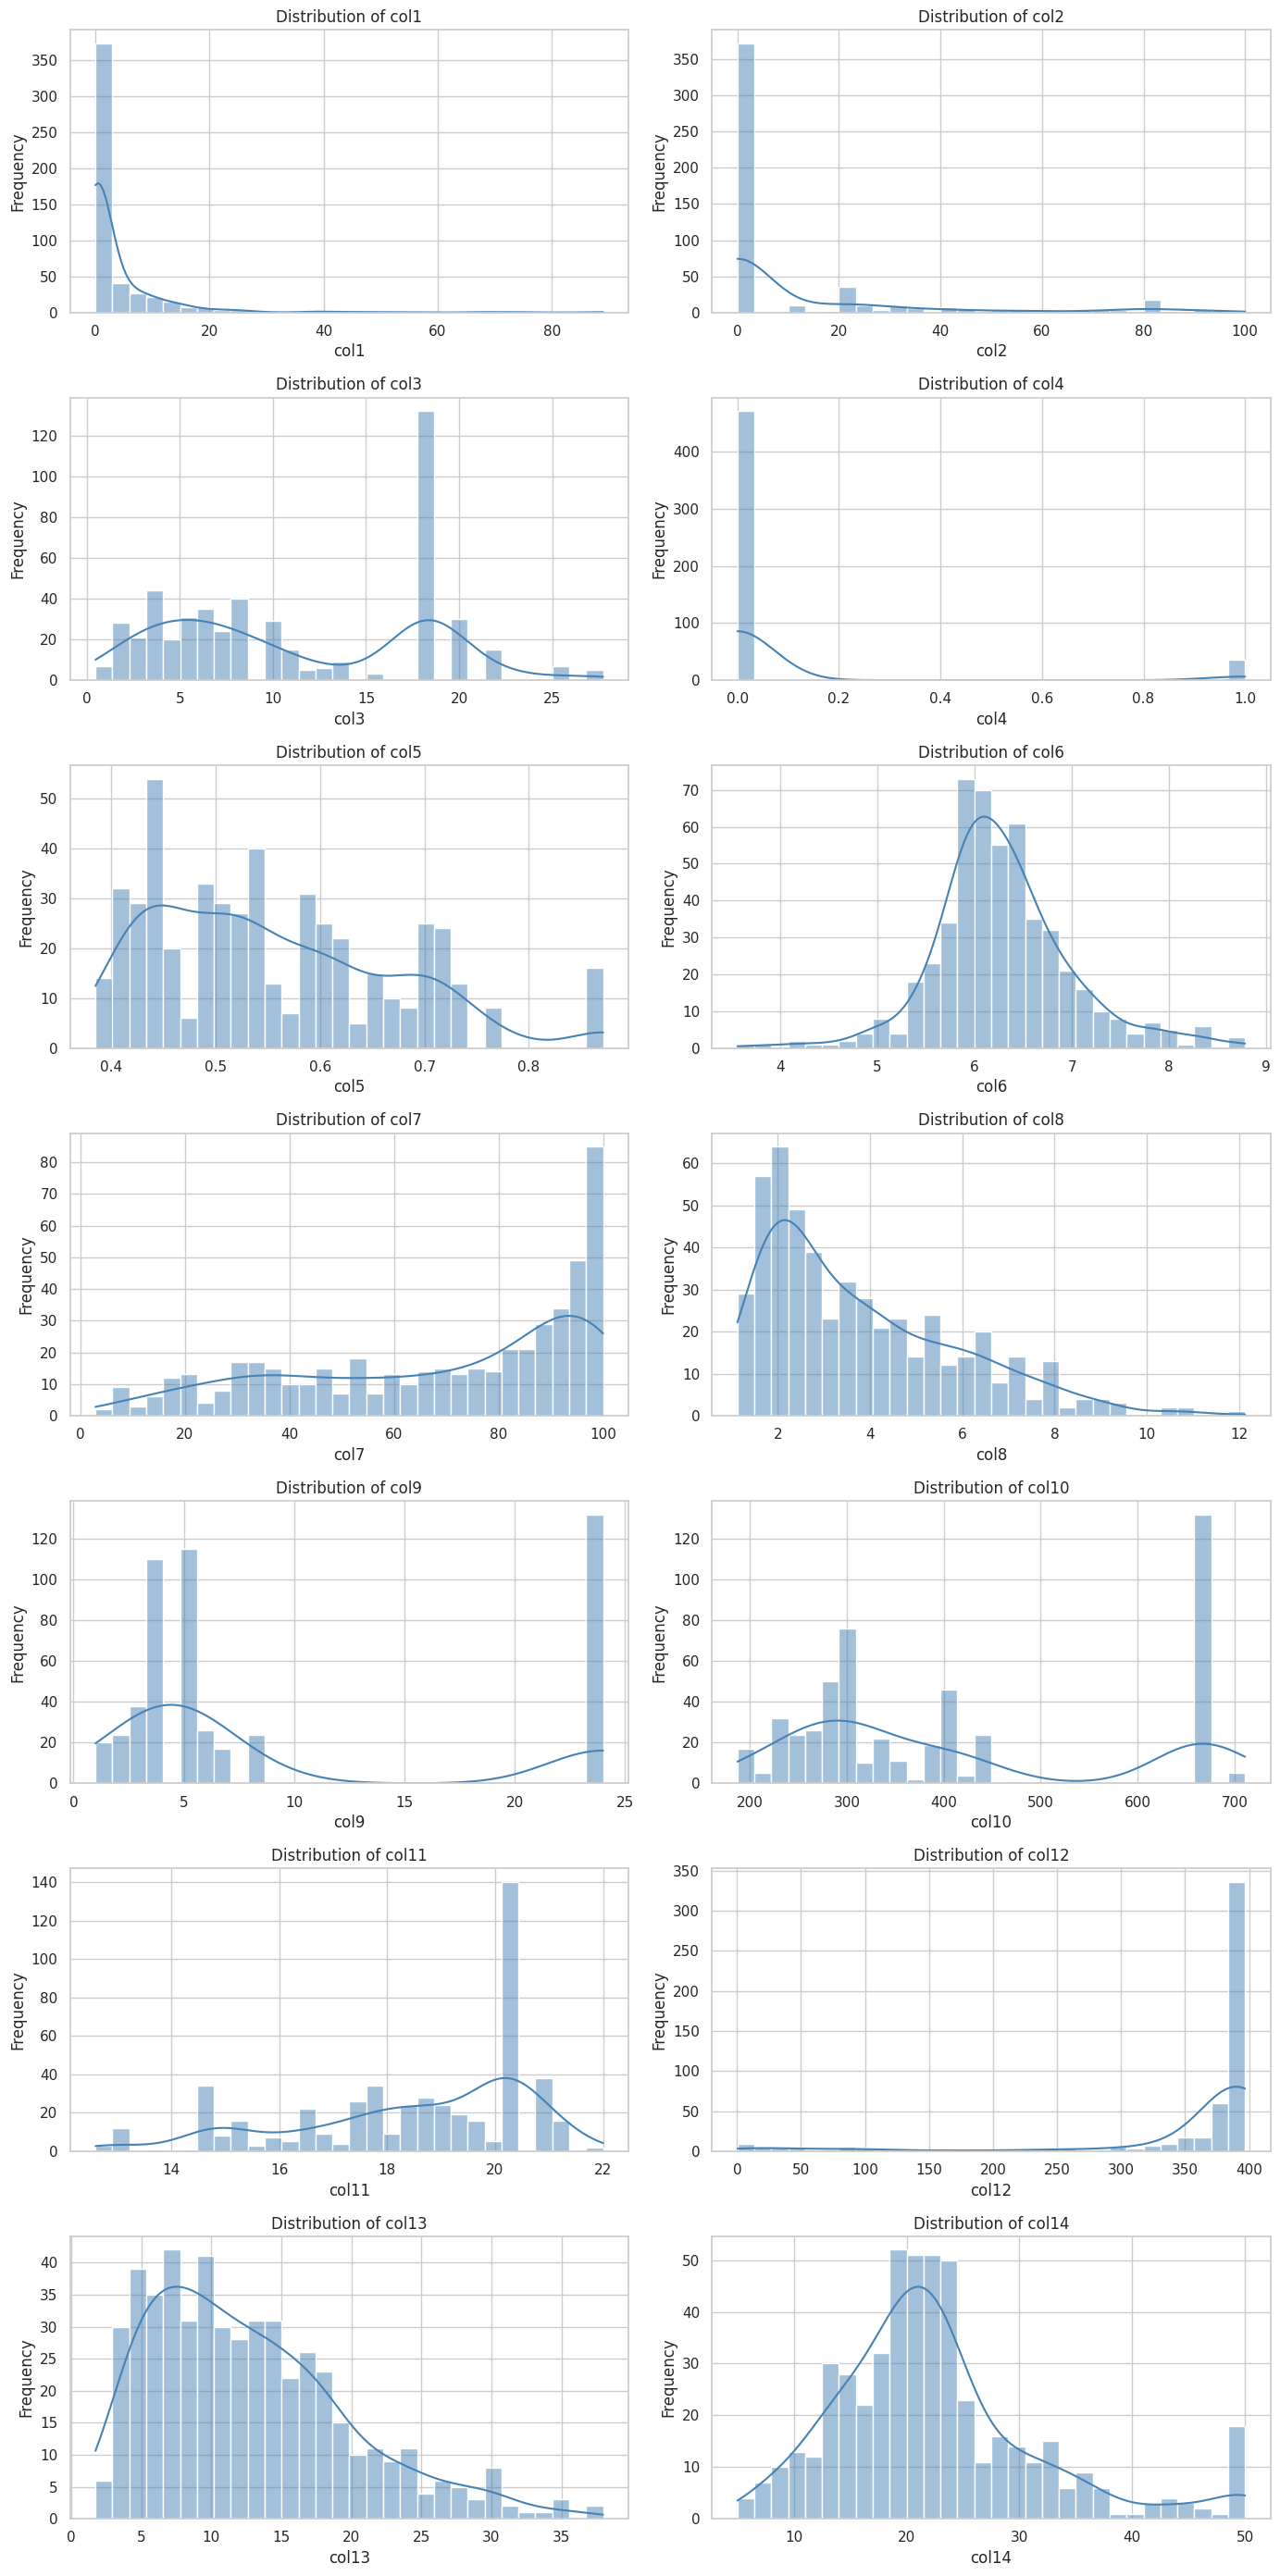

In [12]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Calculate the number of rows needed for subplots
n_cols = 2
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()

# Remove any unused subplots
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, color='steelblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##We plotted histograms for:

House Age

Number of Rooms

Price

What to look for:

Price histogram: If right-skewed, some very expensive houses exist.

House Age histogram: If uniform or slightly skewed, it tells us the age distribution.

Rooms histogram: Helps see if houses are mostly standard size or luxury.

##Interpretation:
If Price shows a right skew, we know luxury houses affect the average, and median is a better measure. If Rooms distribution is normal, most homes have a moderate number of rooms.

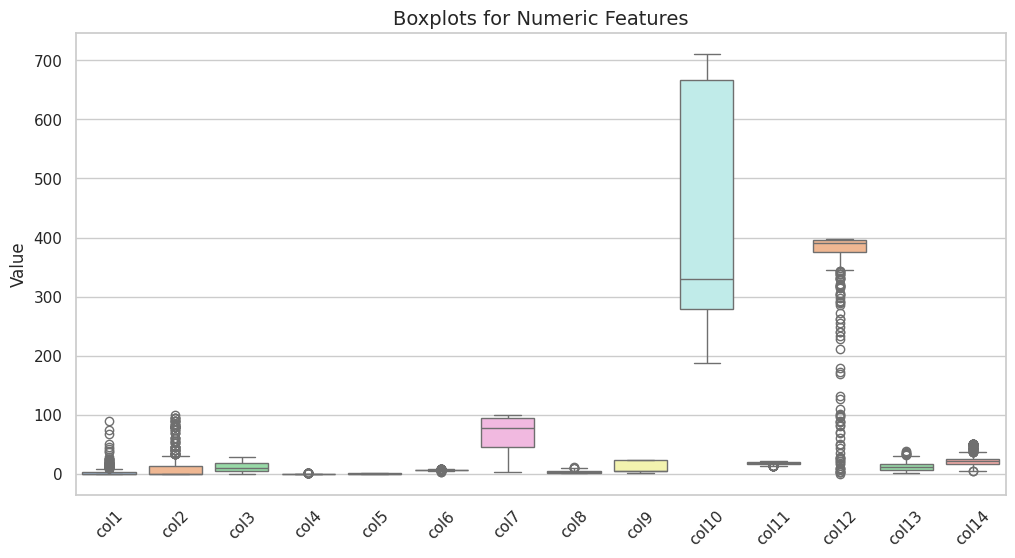

In [13]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols], palette="pastel")
plt.title("Boxplots for Numeric Features", fontsize=14)
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()


##What we found:

If Price has many points beyond the upper whisker, there are outliers (luxury homes).

Rooms may have outliers if some homes are very large.

##Interpretation:
These outliers are important to handle before modeling because they can distort predictions. We might keep them if they represent real market extremes.

# Step 6: Correlation Analysis


--- Correlation Matrix ---


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
col1,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
col2,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
col3,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
col4,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
col5,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
col6,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
col7,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
col8,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
col9,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
col10,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


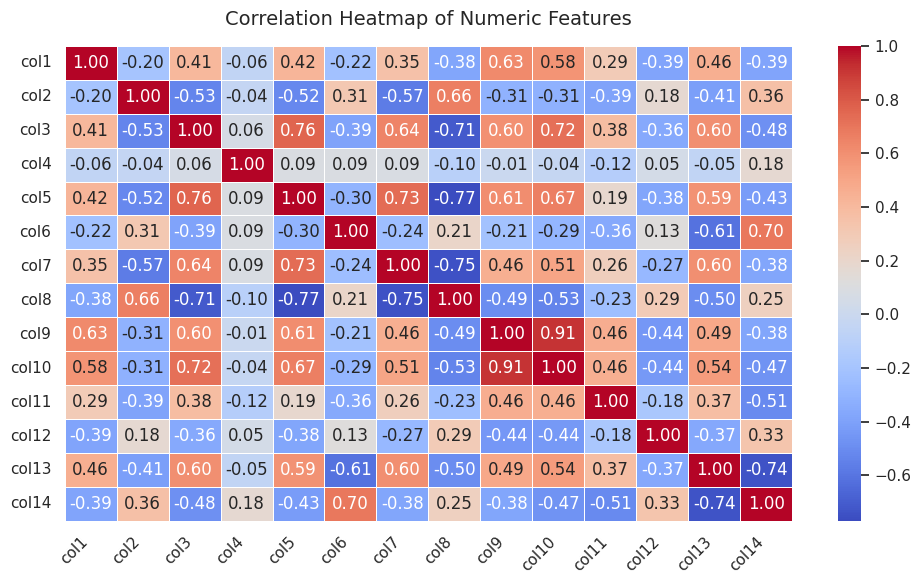

In [20]:
# 📌 STEP 6: Correlation Analysis
# ------------------------------------------------
corr_matrix = df.corr()

print("\n--- Correlation Matrix ---")
display(corr_matrix)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##Key Observations:

If Price and Number of Rooms = 0.85, this is a strong positive correlation.

If Price and House Age = -0.4, older houses tend to have lower prices.

If Bedrooms and Rooms correlation = 0.9, it indicates multicollinearity.

##Interpretation:
This step helps identify the most important features for predicting price and warns about multicollinearity for modeling later.

# Step 7: Key Insights

✅ EDA Completed!

Key Observations:
- Which features have strong correlation with Price?
- Do histograms show normal or skewed distributions?
- Are there outliers in any feature?
- Which variables are most important for predicting Price?
